# Самостоятельная работа

## Сбор первичной информации о проекте:

### Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. ***Распространённая проблема*** фитнес-клубов и других сервисов — ***отток клиентов***. Как понять, что клиент больше не с вами? 

Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. ***Индикаторы оттока*** зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

*Для фитнес-центра* можно считать, что ***клиент попал в отток, если за последний месяц ни разу не посетил спортзал***. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

### Задачи проекта:

*Провести анализ* и *подготовить план* действий по удержанию клиентов сети фитнес-центров "Культурист-датасаентист". А именно:

1. Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента.

2. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства.

3. Проанализировать основные признаки, наиболее сильно влияющие на отток.

4. Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. Выделить целевые группы клиентов;
    2. Предложить меры по снижению оттока;
    3. Определить другие особенности взаимодействия с клиентами.

### Описание данных:

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

1. **Данные клиента за предыдущий до проверки факта оттока месяц**:
    * `'gender'` — пол;
    
    * `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
    
    * `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    
    * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    
    * `'Phone'` — наличие контактного телефона;
    
    * `'Age'` — возраст;
    
    * `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).

2. **Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента**:
    * `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    
    * `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    
    * `'Group_visits'` — факт посещения групповых занятий;
    
    * `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    
    * `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    
    * `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

3. `'Churn'` — **факт оттока в текущем месяце**.

Путь к файлу: `/datasets/gym_churn.csv`

## Основной проект:

### Подготовка данных:

In [1]:
# Add modules to the project
import math as mth
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt 
import itertools

from scipy                   import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.metrics         import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics         import accuracy_score, precision_score, recall_score

from sklearn.cluster         import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

# Logical indicator for local and yandex machine
lmachine = 'yandex'

In [2]:
# Get common information about datasets
def get_info(df, df_name):
    '''
    df : Dataframe,
        The dataset with data for the project
    df_name : Objects
        The name of the dataset for information
        
    Return:
        There are no return fields
    '''
    print(f'Common information about - {df_name}')
    display(df.head())
    print('')
    df.info()
    print('\n', 'Columns name', '\n')
    print(df.columns, '\n')   
    print(f'Numbers of NaN values in the dataset - {df_name}')
    print(df.isnull().sum())
    print('')
    print(f'Numbers of duplicates (explicit)in the dataset - {df_name}')
    print(df.duplicated().sum())
     

# Get data
if lmachine == 'local':
    print('Using local machine')
    main_path = 'C:/Users/Churiulin/Desktop/Yandex/Projects/DATASETS'
    df_gym    = pd.read_csv(f'{main_path}/gym_churn.csv')
else:
    print('Using Yandex machine')
    df_gym    = pd.read_csv('/datasets/gym_churn.csv')

Using Yandex machine


In [3]:
print(get_info(df_gym, 'df_gym')) 

Common information about - df_gym


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

**Комментарий по датасету - df_gym:**

Данный набор данных выглядит нормально. Типы данных соответствуют содержащейся в таблице информации, пропусков нет, явных дубликатов нет. Единственной проблемой может выступать наличие заглавной буквы в названиях колонок. Исправлю данную проблему.

In [4]:
df_gym.columns = df_gym.columns.str.lower()

#print(get_info(df_gym, 'df_gym'))

**Вывод:** Данные были загружены, выполнено первичное ознакомление с данными, исправлены назавания колонок. Переходим к следующему шагу.

### Исследовательский анализ данных (EDA):

1. Посмотрим на датасет и узнаем *есть ли в нем отсутствующие признаки*. Для этого изучим средние значения и стандартные отклонения с помощью метода `describe()`.

In [5]:
print('Array shape', df_gym.shape)
df_gym.describe().loc[['mean', 'std']].T

Array shape (4000, 14)


,mean,std
gender,0.510250,0.499957
near_location,0.845250,0.361711
partner,0.486750,0.499887
promo_friends,0.308500,0.461932
phone,0.903500,0.295313
contract_period,4.681250,4.549706
group_visits,0.412250,0.492301
age,29.184250,3.258367
avg_additional_charges_total,146.943728,96.355602
month_to_end_contract,4.322750,4.191297


**Вывод по разделу:** Всего в базе данных клиентов финтес центра, есть 4 тысячи клиентов, для которых собрано 13 характерных признаков, которые влияют на отток клиентов. Отсутствующих признаков не выявлено

*Дополнительно:* В собранной клиентской базе, представлено примерно равное количество мужчин и женщин, которые предпочитают финтес центры расположенные недалеко от дома. Средний возвраст клиентов 29 лет, и примерно половина всех клиентов являются работниками компаний партнеров. Кроме того, в большинстве случаев клиенты посящают фитнес центр в течение 3 месяцев и имеют по 3- 4 месяца до окончания действующего контракта. 

2. Посмотрим  на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался  для этого воспользуемся методом `groupby()`:

In [6]:
mean_group = df_gym.groupby('churn').mean().T
mean_group.columns =['Клиент ушел (0 - нет)', 'Клиент ушел (1 - да)']
mean_group

,Клиент ушел (0 - нет),Клиент ушел (1 - да)
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод по разделу:** Большинство новых клиентов пришедших в начале месяца ушли из фитнес центра о чем свидетельствует значение в строке `lifetime`. Остальные выводы похожи на предыдущие результаты .  

3. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [7]:
def binary_plot(df   , x_data, hue_data, # Data and columns for plot
                title, xlabel, ylabel  , # Labels for plot 
                ymin , ymax  , step   ): # Limits for plot (y axis)
    '''
    df       : DataFrame 
        Dataframe with data
    x_data   : Objects
        Name of column for analysis
    hue_data : Objects 
        Name of column for dividing x_data
    title    : Objects
        Name of plot (plot title)
    xlabel   : Objects 
        Name of x axis (label)         
    ylabel   : Objects 
        Name of y axis (label) 
    ymin      : Float 
    ymax      : Float
    step      : Float
        Limits for y axis
    '''

    fig = plt.figure(figsize = (15, 5))
    ax  = fig.add_subplot(111) 
    sns.histplot(data     = df      ,
                 x        = x_data  ,
                 hue      = hue_data,
                 ax       = ax      ,
                 multiple = "stack" ,
                 legend   = True    ,
                 palette  = "pastel",
                 element  = "bars"  ,
                 kde      =  False  )
    # Plot labels
    ax.set_title(title  , color = 'black', fontsize = 14, pad = 20)
    ax.set_xlabel(xlabel, color = 'black', fontsize = 14, labelpad = 20)
    ax.set_ylabel(ylabel, color = 'black', fontsize = 14, labelpad = 20)

    ax.grid(True , which     = 'major', 
                   color     = 'k'    ,
                   linestyle = 'solid',
                   alpha     = 0.1    )

    ax.set_yticks(np.arange(ymin, ymax, step))
    
    # Limits for x-axis for columns:
    if x_data in ('gender' , 'near_location', 
                  'partner', 'promo_friends',
                  'phone'  , 'group_visits'):
        ax.set_xticks(np.arange(0, 1.1, 1))
        
    elif x_data in ('contract_period'      , 
                    'month_to_end_contract'):
        ax.set_xticks(np.arange(1.0, 12.1, 1.0))
    elif x_data in ('age'):
        ax.set_xticks(np.arange(15.0, 45.1, 5.0))
    elif x_data in ('lifetime'):
        ax.set_xticks(np.arange(0.0, 30.1, 5.0))
    
    for label in ax.xaxis.get_ticklabels():
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)  
    
       
    plt.show()

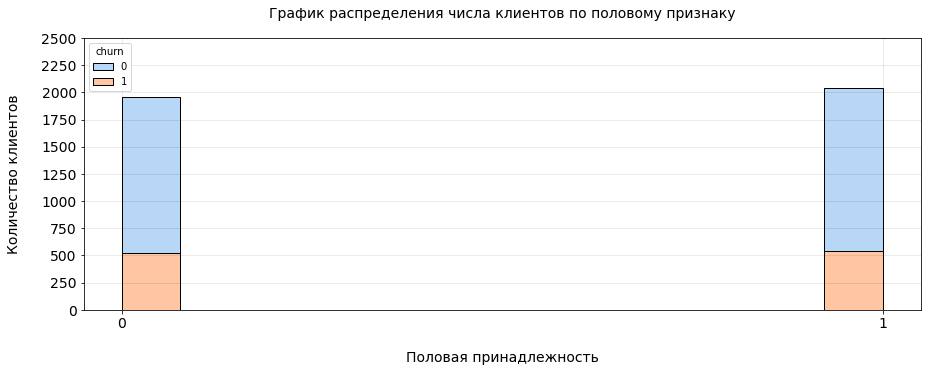

In [8]:
# Plot for gender
binary_plot(df_gym, 'gender', 'churn', 'График распределения числа клиентов по половому признаку' ,
            'Половая принадлежность', 'Количество клиентов', ymin = 0.0, ymax = 2501, step = 250.0)

Особой разницы по половому признаку между клиентами, которые ушли из фитнес центра или остались выявить не удалось. Цифры примерно одинаковые. Предположу, что количество девушек превалирует над число мужчин, которые посещаю фитнес центры.

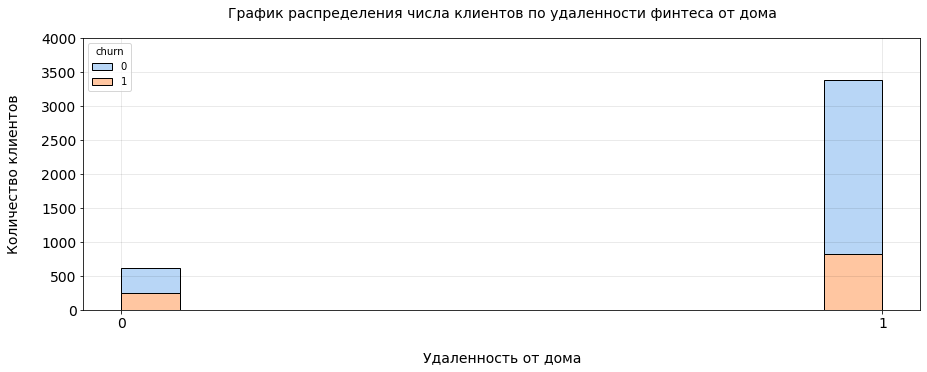

In [9]:
# Plot for location
binary_plot(df_gym, 'near_location', 'churn', 'График распределения числа клиентов по удаленности финтеса от дома',
            'Удаленность от дома'  , 'Количество клиентов', ymin = 0.0, ymax = 4001, step = 500.0)

Много клиентов покунили финтес центры, которые расположены далеко от дома. В то время как клиенты близлежащих центров, гораздо реже покидают такие заведения.

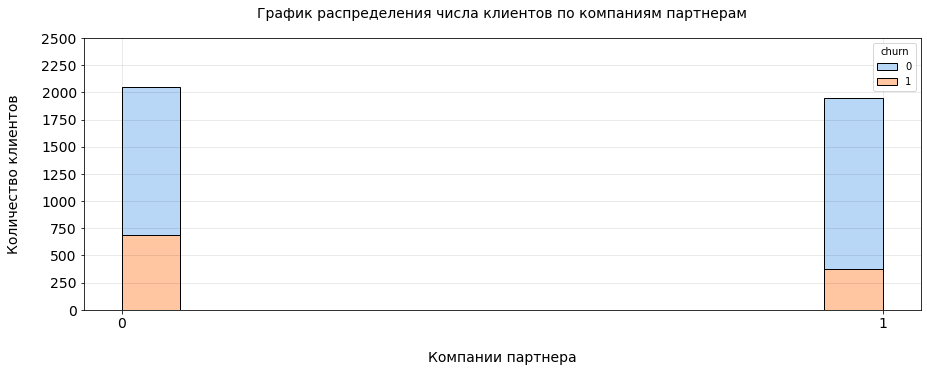

In [10]:
# Plot for partner
binary_plot(df_gym, 'partner', 'churn', 'График распределения числа клиентов по компаниям партнерам' ,
            'Компании партнера'  , 'Количество клиентов', ymin = 0.0, ymax = 2501, step = 250.0)

Сотрудники компаний партнеров чаще покидают финтес центры. 

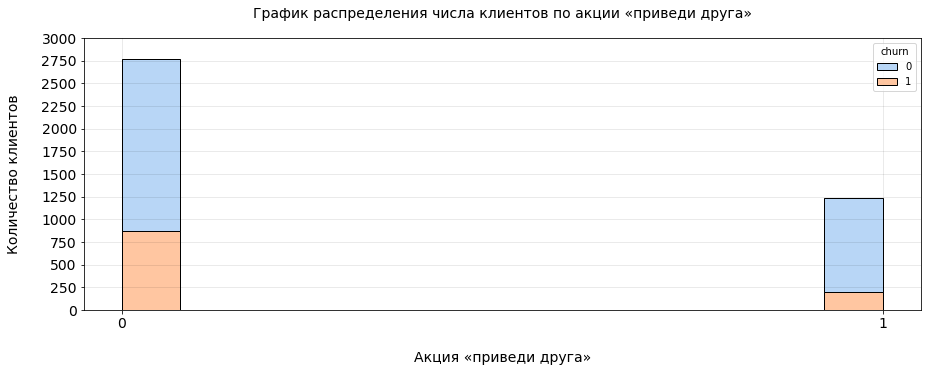

In [11]:
# Plot for promo_friends
binary_plot(df_gym, 'promo_friends', 'churn', 'График распределения числа клиентов по акции «приведи друга»' ,
            'Акция «приведи друга»', 'Количество клиентов', ymin = 0.0, ymax = 3001, step = 250.0)

Ходить с друзьями в фитнес центры это полезно и весело. Такие клиенты реже покидают фитнесы. 

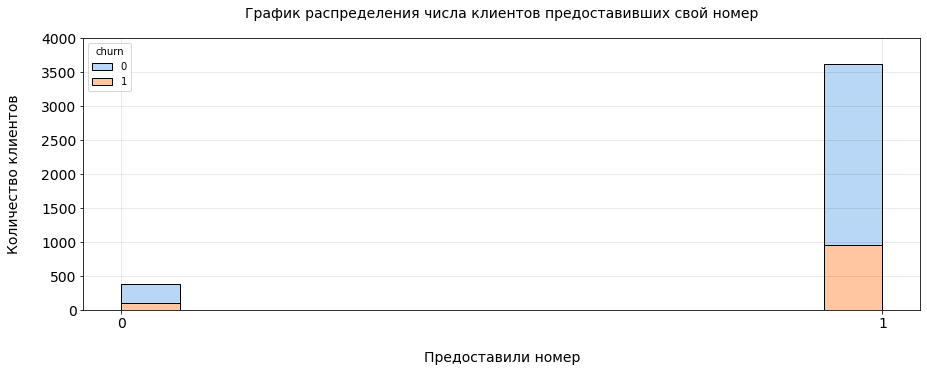

In [12]:
# Plot for phone
binary_plot(df_gym, 'phone', 'churn', 'График распределения числа клиентов предоставивших свой номер' ,
            'Предоставили номер', 'Количество клиентов', ymin = 0.0, ymax = 4001, step = 500.0)

Большинство клиентов предоставляют свои номера. Но сделать предположение о том, что эта информация является какой-то значимой на данном этапе невозможно.

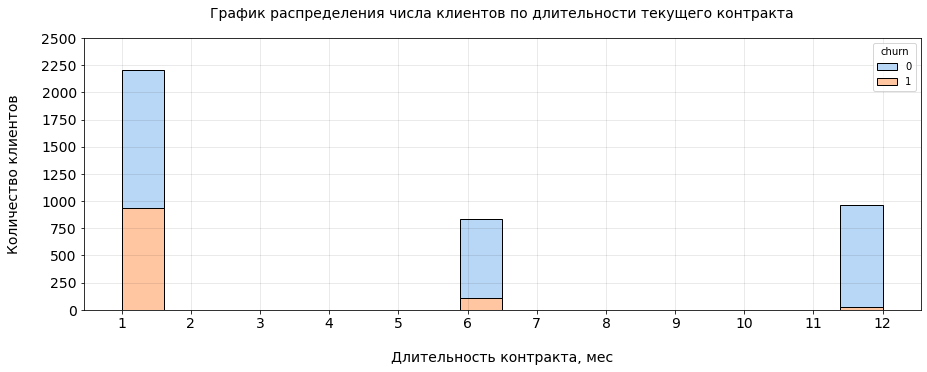

In [13]:
# Plot for contract_period
binary_plot(df_gym, 'contract_period', 'churn', 
            'График распределения числа клиентов по длительности текущего контракта',
            'Длительность контракта, мес', 'Количество клиентов', ymin = 0.0, ymax = 2501, step = 250.0)

Клиенты с длительными контрактами являются постоянными и практически не бросают свой любимый фитнес центр, чего нельзя сказать о клиентах с короткими контрактами.

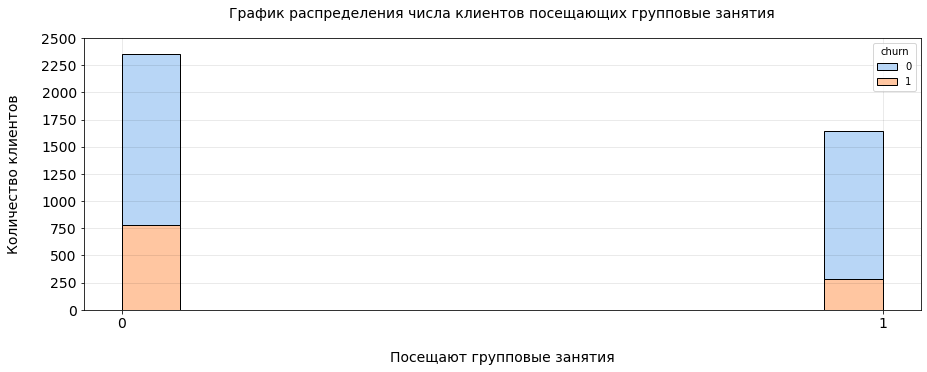

In [14]:
# Plot for group_visits
binary_plot(df_gym, 'group_visits', 'churn', 'График распределения числа клиентов посещающих групповые занятия' ,
            'Посещают групповые занятия', 'Количество клиентов', ymin = 0.0, ymax = 2501, step = 250.0)

Групповые занятия определенным образом привлекают клиентов и не дают им заскучать. Клиенты, которые не посящают групповые занятия чаще уходят. 

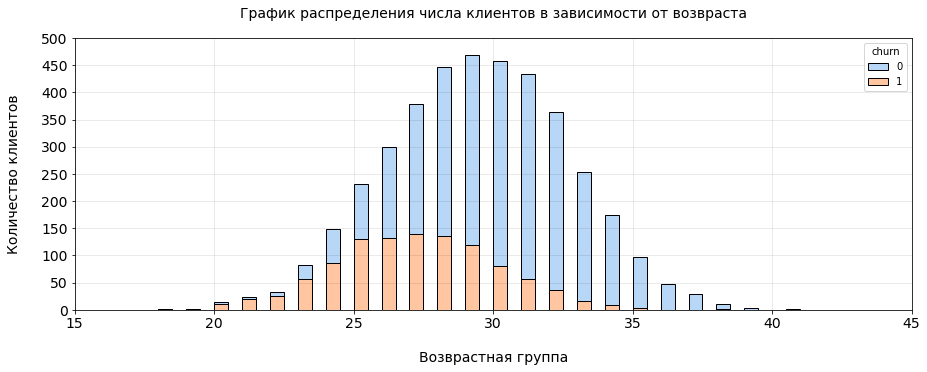

In [15]:
binary_plot(df_gym, 'age', 'churn', 'График распределения числа клиентов в зависимости от возвраста' ,
            'Возврастная группа', 'Количество клиентов', ymin = 0.0, ymax = 501, step = 50.0)

Средний возвраст людей, которые надолго остаются в финтес центре от 27 до 32 лет. Чаще уходят из финтеса центра люди в возврасте от 25 до 28 лет. Возможно они просто еще не нашли свой фитнес центр.

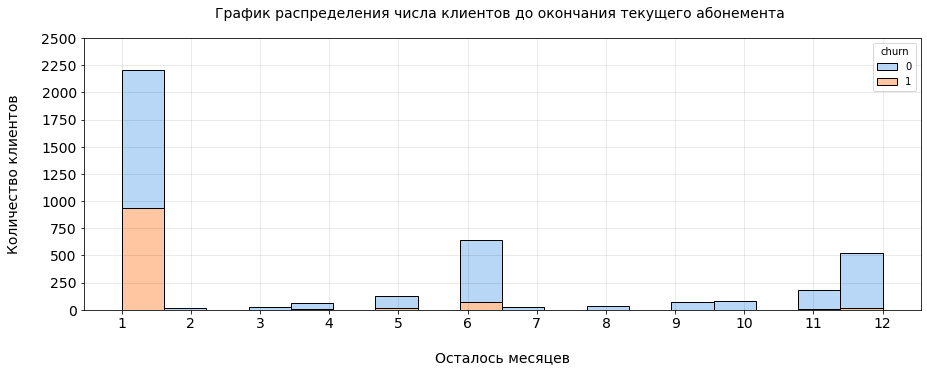

In [16]:
binary_plot(df_gym, 'month_to_end_contract', 'churn',
            'График распределения числа клиентов до окончания текущего абонемента ' ,
            'Осталось месяцев', 'Количество клиентов', ymin = 0.0, ymax = 2501, step = 250.0)

Клиенты чаще покидают финтес центры, когда их контаркты заканчиваются через 1 месяц. 

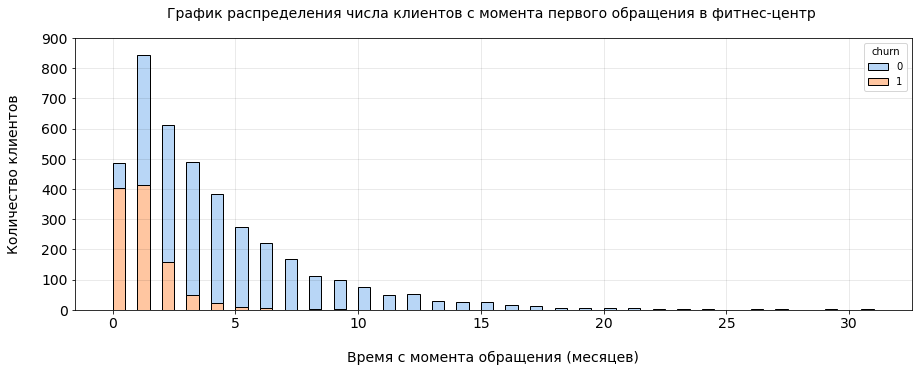

In [17]:
binary_plot(df_gym, 'lifetime', 'churn', 
            'График распределения числа клиентов с момента первого обращения в фитнес-центр ' ,
            'Время с момента обращения (месяцев)', 'Количество клиентов', ymin = 0.0, ymax = 901, step = 100.0)

Данные график подтверждает предположение из пункта 2, о том что новые клиенты, быстро уходят, а постоянные клиенты остаются с фитнес центром надолго.

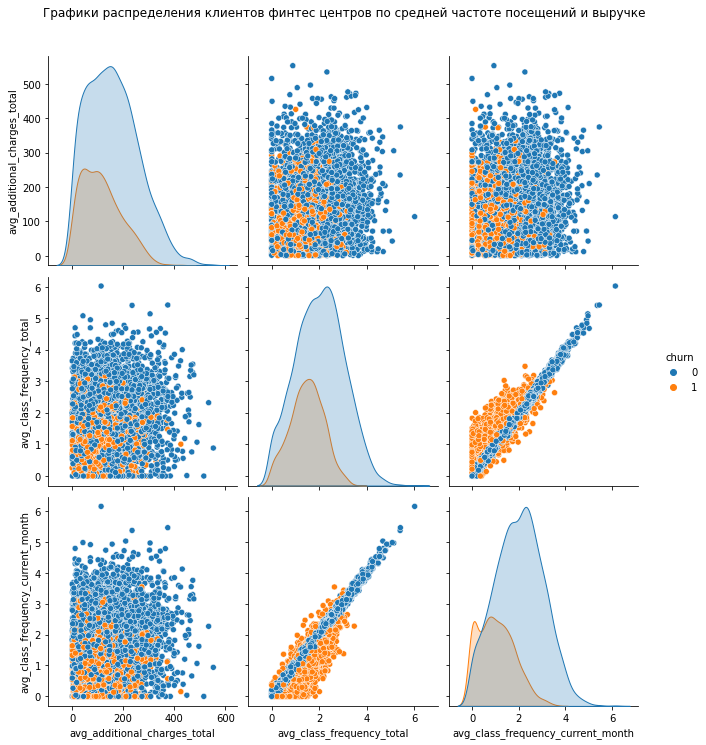

In [18]:
df_gym2 = df_gym.loc[:,['avg_additional_charges_total'     , 
                        'avg_class_frequency_total'        ,
                        'avg_class_frequency_current_month',
                        'churn'                            ]]
    
plot = sns.pairplot(df_gym2, hue='churn'); 
plot.fig.set_size_inches(10,10)
plot.fig.suptitle("Графики распределения клиентов финтес центров по средней частоте посещений и выручке", y=1.05)

plt.show()

Постоянные клиенты чаще ходят в финтес центры и приносят больше выручки (суммарно). 

4. Построим  матрицу корреляций.

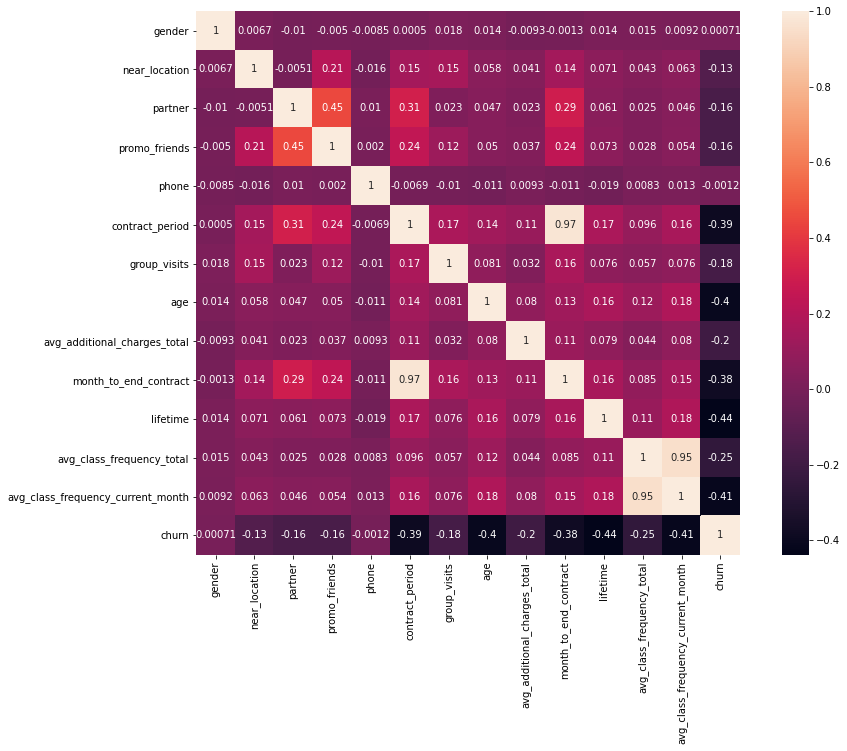

In [19]:
# Create correlation matrix
df_gym_corr = df_gym.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_gym_corr, annot = True, square = True)
#ax.set_ylim(7, 0)
plt.show()

**Вывод по разделу:** На отток клиентов сильно влияют такие показатели как: 
* `age` - возраст,
* `contract_period` - длительность текущего действующего абонемента,
* `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах),
* `Month_to_end_contract` - срок до окончания текущего действующего абонемента,
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц.

Значительно меньшее влияние имеют показатели:
- `Near_Location` - проживание или работа в районе, где находится фитнес-центр;
- `Partner` - сотрудник компании-партнёра клуба;
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга»
- `Group_visits` - факт посещения групповых занятий;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;

Также есть ряд факторов, которые практически никак не влияют на отток клиентов, следовательно такие факторы, могут быть исключены из дальнейшего анализа. 
* `gender` — пол;
* `Phone` — наличие контактного телефона;

Кроме того, признаки `avg_class_frequency_current_month` и `avg_additional_charges_total`, `contract_period` и `month_to_end_contract` имеют очень высокую корреляцию (0.95, 0.97) между собой.  В связи с чем, модель может ошибочно переобучится и будет не устойчива, поскольку наблюдается  взаимная корреляции признаков.

Поэтому оставлю только по одному признаку признак из каждой пары: `Avg_class_frequency_current_month` и `contract_period`

### Модель прогнозирования оттока клиентов:

In [20]:
# Разделяю данные на признаки (матрица X) и целевую переменную (y)
#X = df_gym.drop(['churn', 'avg_additional_charges_total',
#                 'month_to_end_contract'], axis = 1)

X = df_gym.drop(['churn', 'gender', 'phone', 
                 'avg_additional_charges_total',
                 'month_to_end_contract'], axis = 1)

y = df_gym['churn']

# Разделяю модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создаю объект класса StandardScaler и применяю его к обучающей выборке
scaler = StandardScaler()

# Обучаю scaler и одновременно трансформирую матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)  

# Применяю стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# Задаю список моделей
models = [LogisticRegression(random_state = 0)        ,
          RandomForestClassifier(random_state = 0)    ,
          GradientBoostingClassifier(random_state = 0)]   
    
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(mod, X_train, y_train, X_test, y_test):
    # алгоритм для модели
    model = mod
    # обучаю модель
    model.fit(X_train, y_train)   
    # делаю прогноз с использованием обученной модели
    y_pred = model.predict(X_test)
    # Считаю метрики для моделей
    print('MAE:{:.2f} MSE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred),
                                                    mean_squared_error (y_test, y_pred),
                                                    r2_score           (y_test, y_pred))
         )
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(accuracy_score (y_test, y_pred),
                                                                   precision_score(y_test, y_pred),
                                                                   recall_score   (y_test, y_pred))
         )
    
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print('')

LogisticRegression(random_state=0)
MAE:0.07 MSE:0.07 R2:0.60 
Accuracy:0.93 Precision:0.86 Recall:0.84 

RandomForestClassifier(random_state=0)
MAE:0.07 MSE:0.07 R2:0.62 
Accuracy:0.93 Precision:0.85 Recall:0.86 

GradientBoostingClassifier(random_state=0)
MAE:0.07 MSE:0.07 R2:0.62 
Accuracy:0.93 Precision:0.87 Recall:0.85 



**Вывод по разделу:** В ходе выполения данной задачи я обучил и использовал три модели (**LogisticRegression**, **RandomForestClassifier**, **GradientBoostingClassifier**), которые позволяют выполнить бинарную классификацию с учителем. Выполнив предварительную стандартизацию и разбивку выборки в соотношении 80 на 20, я рассчитал метрики для оценки эффективности обученных моделей. 

Для оценки я использовал такие показатели как: **MAE**, **MSE**, **R2**, которые показывают общие представления о качестве работы моделей. Кроме того, я использовал и рассчитал статистические параметры **accuracy**, **precision** и **recall**. 

На основании, которых показывают, что модель **GradientBoostingClassifier**.  Из модель, которые изначально указывались в задании наилучший результат имеет **LogisticRegression**. При этом если предварительно исключить из выборки два столбца с наименьшими коэффициентами корреляции *gender*, *phone*, то нет разницы между моделями *LogisticRegression*, *RandomForestClassifier*.

Дополнительно выполню повторное обучение лучшей модели для определения наиболее важных признаков, которые влияют на отток клиентов.

In [21]:
# Обучаю  финальную модель
final_model = GradientBoostingClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

importances = final_model.feature_importances_

priznak = []
for i in X_test.columns:
    priznak.append(i)

data_init = {'Priznak': priznak, 'Importance': importances}
df = pd.DataFrame(data = data_init)
print(df.sort_values(by = 'Importance', ascending = False)) 

                             Priznak  Importance
6                           lifetime    0.474944
8  avg_class_frequency_current_month    0.184664
3                    contract_period    0.126196
7          avg_class_frequency_total    0.113785
5                                age    0.090188
4                       group_visits    0.006814
2                      promo_friends    0.002529
0                      near_location    0.000755
1                            partner    0.000125


**Вывод по разделу:** Наиболее важными признаками, на которые стоит обращать внимания являются:
* `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах),
* `avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
* `contract_period` - длительность текущего действующего абонемента,

Следовательно, можно предположить, что основная наша задача для того чтобы уменьшить отток клиентов заключается в создании такой среды, в результате которой клиенты купившие короткий (пробный) абонемент стали нашими постоянными клиентами. 

Кроме того, наши постоянные клиенты не должны заскучать и в этом нам помогу качественные групповые занятия. Следовательно, уделим большее внимание подбору персонала, программам и оборудованию для групповых занятий.

### Кластеризация клиентов:

1. Построю матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисую **дендрограмму**. 

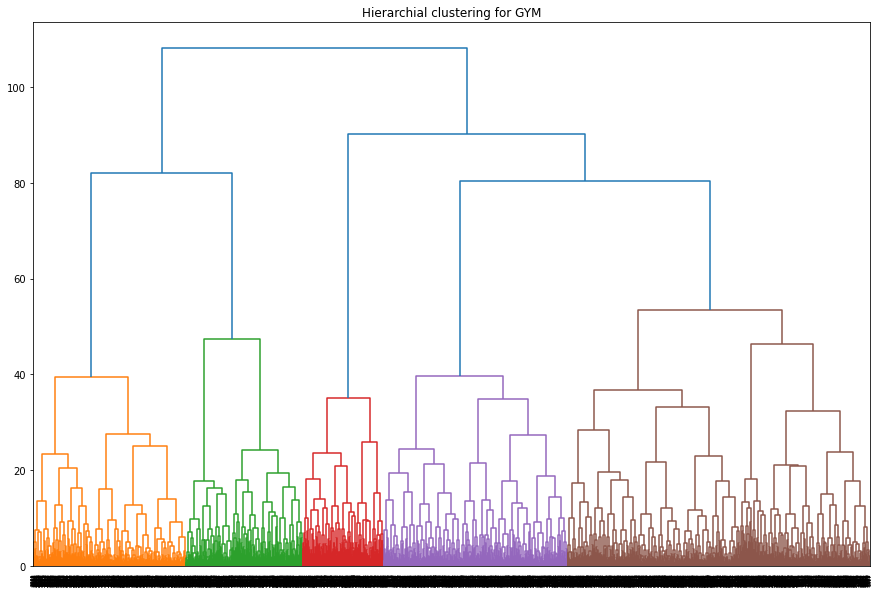

In [22]:
df_gym_classter = df_gym.drop(['avg_additional_charges_total',
                               'month_to_end_contract'], axis = 1)

# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(df_gym_classter)

linked = linkage(X_sc, method = 'ward') 

# В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Предположу, что оптимальным является 5 кластеров — пять разных цветов на графике.

2. Обучу модель кластеризации на основании алгоритма `K-Means` и спрогнозирую кластеры клиентов. Число кластеров приму `n=5`, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. 

In [23]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(df[x_name], df[y_name], hue = df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state = 0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df_gym_classter['cluster_km'] = labels                    

3. Выведу средние значения признаков для кластеров.

In [24]:
# выводим статистику по средним значениям наших признаков по кластеру
mean_klassters = df_gym_classter.groupby('cluster_km').mean().T
mean_klassters

cluster_km,0,1,2,3,4
gender,0.477916,0.508995,0.526042,0.545652,0.500000
near_location,0.806342,0.761905,0.864583,0.841304,0.971198
partner,0.396376,0.342857,0.473958,0.323913,0.913594
promo_friends,0.054360,0.177778,0.307292,0.059783,0.973502
phone,1.000000,0.998942,0.000000,0.998913,1.000000
contract_period,4.596829,1.646561,4.768229,4.927174,7.771889
group_visits,0.394111,0.256085,0.427083,0.443478,0.561060
age,30.129105,26.901587,29.296875,29.990217,29.804147
lifetime,4.650057,0.975661,3.932292,4.704348,4.646313
avg_class_frequency_total,1.153868,1.447700,1.851384,2.917544,1.997770


Можно заменить, что для 0, 3 класса более характерны более продолжительные контракты. Люди из этих классетеров реже уходят из фитнес центров и чаще посещают групповые занятия. Также отмечу, что средний возвраст в данных кластерах около 30 лет.  Люди из этих кластеров редко приглашают своих друзей.

Кластер 1 - люди имеют коротки (1 месяц) контракты и практически все покидают финтес центр после его окончания. Средний возвраст - 26 лет. Возможно люди ищут наиболее дешевые варианты и используют различные промо акции.

Кластеры 2 и 4 стабильные. Средний возвраст 29 лет, количество мужчин и женщин примерно одинаковое. Активно  используют акцию - пригласи друга и являются сотрудниками компаний партнеров (особенно кластер 4). В среднем посящают фитнес 2 раз в месяц.

4. Построю распределения признаков по кластерам.

('age', 'lifetime')


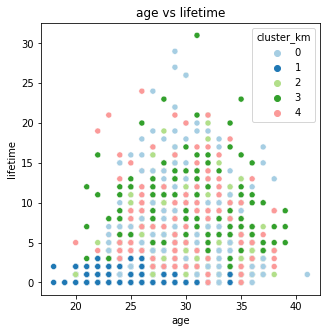

('age', 'avg_class_frequency_total')


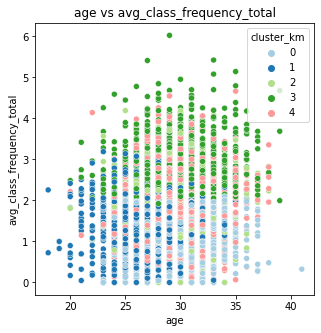

('age', 'avg_class_frequency_current_month')


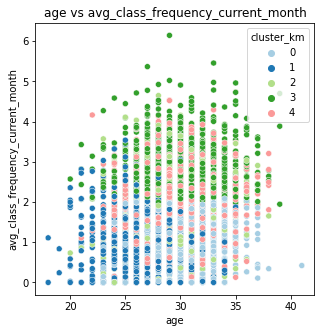

('age', 'churn')


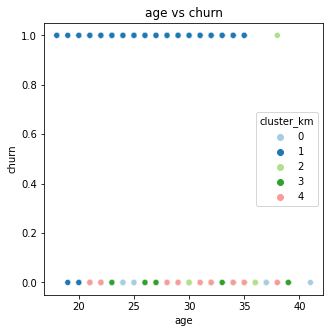

('lifetime', 'avg_class_frequency_total')


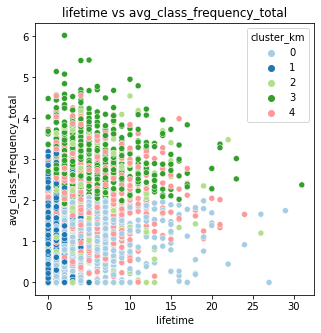

('lifetime', 'avg_class_frequency_current_month')


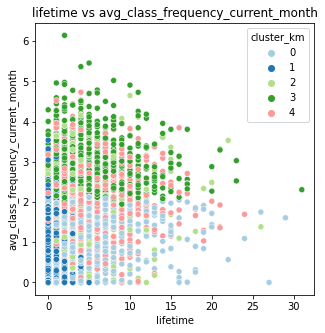

('lifetime', 'churn')


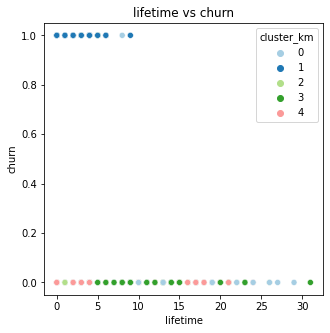

('avg_class_frequency_total', 'avg_class_frequency_current_month')


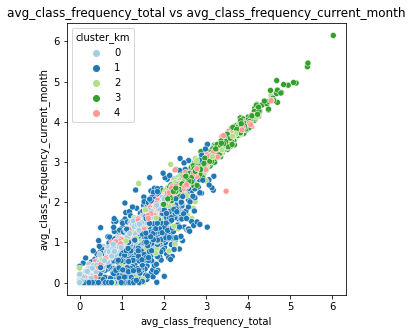

('avg_class_frequency_total', 'churn')


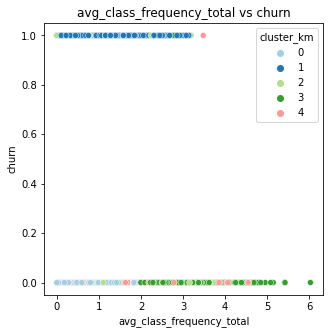

('avg_class_frequency_current_month', 'churn')


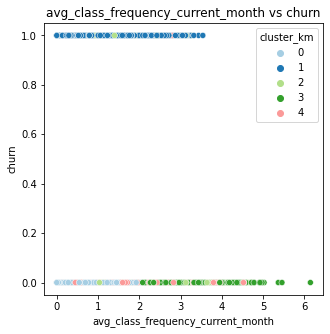

In [25]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(df_gym_classter.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    if pair[0] not in ('gender' , 'near_location'  ,
                       'partner', 'promo_friends'  ,
                       'phone'  , 'contract_period',
                       'group_visits') :
        print(pair)
        show_clusters_on_plot(df_gym_classter, pair[0], pair[1], 'cluster_km')

Остальные кластеры не отрисовываю, поскольку все они имеют разделение по бинарным признакам 0 и 1.

Из остальных можно выделить наличие корреляции в паре `('avg_class_frequency_total', 'avg_class_frequency_current_month')` и разброс точек между остальными данными.

5. Для каждого полученного кластера посчитаю долю оттока (методом `groupby()`). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [26]:
df_ottok = df_gym_classter.groupby('cluster_km').agg({'churn':'mean'})
df_ottok

,churn
cluster_km,
0,0.001133
1,0.996825
2,0.265625
3,0.004348
4,0.013825


Наиболее склонны к оттоку кластеры 1 и 2. Кластеры 1, 2, 4 наиболее стабильны.

#  Общие выводы и базовые рекомендации по работе с клиентами:

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

Клиенты приходят и уходят, но для нас является важным создать для наших клиентов комфортные условия. Чтобы уменьшить отток клиентов нам надо:
1. Создать такую среду, в результате которой клиенты купившие короткий (пробный) абонемент стали нашими постоянными клиентами. 

2. Наши постоянные клиенты не должны заскучать и в этом нам помогу качественные групповые занятия. Следовательно, уделим большее внимание подбору персонала, программам и оборудованию для групповых занятий.

3. Сосредоточить внимание на клиентах с близлежащих районов. 

4. Мы никак не можем повлиять на возвраст наших клиентов, но мы можем подумать над создание специальных акций для людей младшей 26 лет, представленных в основном студентами или начинающими специалистами. Возможно предлагать хорошие скидки за привлечение друзей.